In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import os
import networkx as nx


from scipy.optimize import curve_fit
from config.sqlcollect import getTable
from config.network import graphCreation
from config.cubes import makeCubes
from config.seismicZones import query
from config.network import graphCreation3


from motifs_areasVolumesEnergy import*


In [2]:
import matplotlib.pyplot as plt
import os

from config.sqlcollect import getTable
from config.seismicZones import query


In [3]:
# ---------------------------SETUP AND COLLECTION OF QUAKES------------------------------------#
# Which region do you want to analyze ?
region = input('Input region : vrancea / romania / california / italy / japan : ')

# The side of the cubes that you split the region in 
#side = int(input('Input side of the cube split in km 5 / 10 / 20 : '))

# The condition for the SQL collection
sql_query= query(region)

# Magnitude windows for the condition that collects the database through mySQL
magMin = int(input('Input minimum magnitude: '))
magMax = int(input('Input maximum magnitude: '))
# Add to condition
sql_query+=f" AND magnitude>={magMin} AND magnitude<={magMax}"

print(sql_query)

# Collect the earthquakes
quakes = getTable(sql_query)
quakes.head()

SELECT * FROM romania WHERE datetime >='1976-01-01 00:00:00' AND latitude>=45.2 AND latitude<=46 AND longitude>=26 AND longitude<=27 AND depth>=50 AND depth<=200 AND magnitude>=2 AND magnitude<=10


/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,datetime,latitude,longitude,depth,magnitude
0,1976-08-19 19:03:00.800,45.54,26.37,162.0,2.3
1,1976-09-07 17:38:08.200,45.62,26.50,155.3,3.6
2,1976-10-01 17:50:43.200,45.68,26.49,146.0,6.0
3,1977-03-04 19:21:54.100,45.77,26.76,94.0,7.4
4,1977-03-04 21:21:01.100,45.22,26.65,141.0,3.0


In [4]:
mapcoords={'minLat':min(quakes['latitude']),
            'maxLat':max(quakes['latitude']),
            'minLon':min(quakes['longitude']),
            'maxLon':max(quakes['longitude']),
            'minDepth':min(quakes['depth']),
            'maxDepth':max(quakes['depth'])
            }

In [5]:
print(mapcoords)


{'minLat': 45.2, 'maxLat': 46.0, 'minLon': 26.0, 'maxLon': 27.0, 'minDepth': 50.0, 'maxDepth': 196.0}


## VISUALIZATION

In [14]:
#import ipympl

from visualization import visualize

In [15]:
# ----------------------------------------------------------------------------------------------#

# ----------------------------------2D MAP PROJECTION----------------------------------------------#
# Choose if you wish to include a projection of the region's map as 2D image under the 3D scatterplot
# You require png images with the maps for this to" work
withMap = input('Do you wish the scatter to have a projection of the region map ? True / False : ')

/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 1440x1440 with 0 Axes>

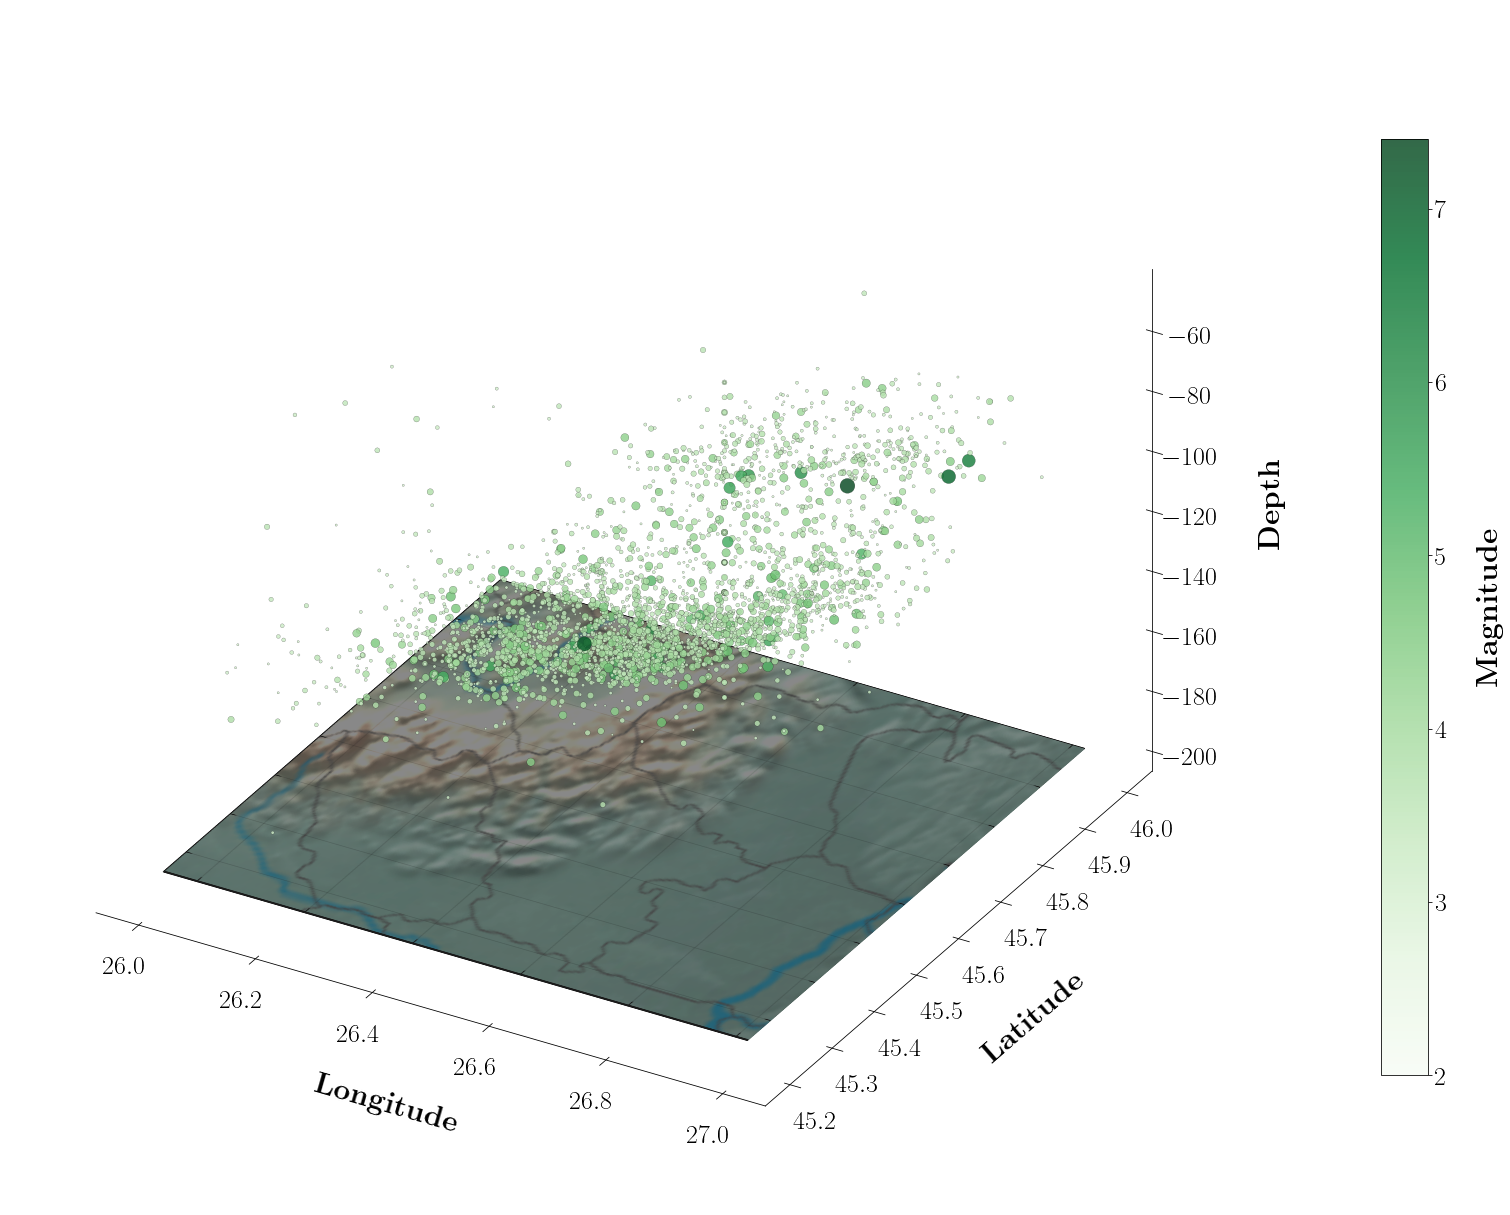

In [16]:
# %matplotlib widget

plt.figure(figsize=(20,20))
ax = visualize(quakes,region,withMap,mapcoords)



if not os.path.exists(f'./results/{region}/visualization'):
    os.makedirs(f'results/{region}/visualization')


if withMap == 'True':
    plt.savefig(f'./results/{region}/visualization/{region}_{magMin}mag_map.png',
                facecolor='white', transparent=False, bbox_inches = "tight" )
    #plt.savefig(f'./results/{region}/visualization/{region}_maptest.svg', bbox_inches = "tight" )
elif withMap == 'False':
    plt.savefig(f'./results/{region}/visualization/{region}_{magMin}mag_nomap.png',
                facecolor='white', transparent=False, bbox_inches = "tight")
    #plt.savefig(f'./results/{region}/visualization/{region}_nomaptest.svg', bbox_inches = "tight" )

## SPLIT REGION IN CUBES

In [6]:
from config.cubes import makeCubes

In [7]:
quakes

,datetime,latitude,longitude,depth,magnitude
0,1976-08-19 19:03:00.800,45.5400,26.3700,162.0,2.3
1,1976-09-07 17:38:08.200,45.6200,26.5000,155.3,3.6
2,1976-10-01 17:50:43.200,45.6800,26.4900,146.0,6.0
3,1977-03-04 19:21:54.100,45.7700,26.7600,94.0,7.4
4,1977-03-04 21:21:01.100,45.2200,26.6500,141.0,3.0
...,...,...,...,...,...
7668,2022-03-30 06:48:34.830,45.5656,26.5115,130.9,3.0
7669,2022-03-30 10:09:49.660,45.5255,26.5076,112.3,2.7
7670,2022-03-30 18:53:08.850,45.7415,26.6735,135.4,2.8
7671,2022-03-30 19:19:42.570,45.5642,26.4690,113.1,3.1


In [8]:
quakes = makeCubes(quakes,region)
quakes.head()

,datetime,latitude,longitude,depth,magnitude,xLatitude,yLongitude,zDepth,cubeIndex,cubeLatitude,cubeLongitude,cubeDepth
0,1976-08-19 19:03:00.800,45.54,26.37,162.0,2.3,8,6,23,6055,45.5378,26.3481,162.5
1,1976-09-07 17:38:08.200,45.62,26.50,155.3,3.6,10,9,21,7822,45.6279,26.5380,152.5
2,1976-10-01 17:50:43.200,45.68,26.49,146.0,6.0,11,8,20,8633,45.6730,26.4747,147.5
3,1977-03-04 19:21:54.100,45.77,26.76,94.0,7.4,13,13,9,10449,45.7631,26.7911,92.5
4,1977-03-04 21:21:01.100,45.22,26.65,141.0,3.0,1,11,19,309,45.2225,26.6646,142.5


## NETWORK CREATION

In [9]:
import networkx as nx
from config.network import graphCreation

In [10]:
quakesGraph = graphCreation(quakes)

In [11]:
print(nx.info(quakesGraph))

Graph with 1692 nodes and 7423 edges


/tmp/ipykernel_594762/3776672541.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(quakesGraph))


## MOTIFS

In [1]:
from nemomap.motifsdiscovery import getMotif
import json

In [2]:
# For which region networks do you want to discover motifs ?
region = input('Input region : vrancea / romania / california / italy / japan : ')

# What motifs do you want to discover ?
motif = input('Input motif: Triangles / Tetrahedrons : ')

In [3]:
stats = getMotif(region,motif)
motifStats={}
motifStats[region]={}
motifStats[region][motif]=stats

with open(f"./motifs/motifStats_{region}.json","w") as f:
    json.dump(motifStats,f)

queryTetrahedrons.txt
/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks
networkvrancea_10km_3mag.txt


Input Graph: Nodes - 320; Edges - 2534
Query Graph: Nodes - 4; Edges - 4

Query Graph (sub-graph) Edges: 
[0, 1]
[1, 2]
[2, 3]
[0, 3]

H node = [ 3 ]

Mapping: 37656

countN:  0

Mapping: 37656
Average of Mapping in Random Graphs: 20198.0

P value:  0.0
Z Score:  undefined
Time taken: 3.9635770320892334 seconds
networkvrancea_5km_4mag.txt


Input Graph: Nodes - 264; Edges - 375
Query Graph: Nodes - 4; Edges - 4

Query Graph (sub-graph) Edges: 
[0, 1]
[1, 2]
[2, 3]
[0, 3]

H node = [ 3 ]

Mapping: 3

countN:  1

Mapping: 3
Average of Mapping in Random Graphs: 5.0

P value:  1.0
Z Score:  undefined
Time taken: 0.022969961166381836 seconds
networkvrancea_10km_1mag.txt


Input Graph: Nodes - 536; Edges - 5048
Query Graph: Nodes - 4; Edges - 4

Query Graph (sub-graph) Edges: 
[0, 1]
[1, 2]
[2, 3]
[0, 3]

H node = [ 3 ]

Mapping: 119334

countN:  0

Mapping: 119334
Average of Mapping in Ra

KeyboardInterrupt: 

In [ ]:
for region in ['california','italy','japan']:
    for motif in ['Triangles','Tetrahedrons']:
        stats = getMotif(region,motif)
        motifStats={}
        motifStats[region]={}
        motifStats[region][motif]=stats
        

In [4]:
stats

{'networkvrancea_10km_3mag.txt': {'Nodes': 320,
  'Edges': 2534,
  'Mappings': 11909,
  'AvgMap': 3918.0,
  'Time': 0.45299386978149414},
 'networkvrancea_5km_4mag.txt': {'Nodes': 264,
  'Edges': 375,
  'Mappings': 3,
  'AvgMap': 5.0,
  'Time': 0.007648944854736328},
 'networkvrancea_10km_1mag.txt': {'Nodes': 536,
  'Edges': 5048,
  'Mappings': 37121,
  'AvgMap': 10419.0,
  'Time': 1.5338895320892334},
 'networkvrancea_10km_2mag.txt': {'Nodes': 519,
  'Edges': 4960,
  'Mappings': 36789,
  'AvgMap': 6380.0,
  'Time': 1.475003957748413},
 'networkvrancea_10km_4mag.txt': {'Nodes': 113,
  'Edges': 326,
  'Mappings': 135,
  'AvgMap': 41.0,
  'Time': 0.008726119995117188},
 'networkvrancea_5km_2mag.txt': {'Nodes': 1684,
  'Edges': 7383,
  'Mappings': 2137,
  'AvgMap': 945.0,
  'Time': 0.7603740692138672},
 'networkvrancea_5km_1mag.txt': {'Nodes': 1723,
  'Edges': 7471,
  'Mappings': 2124,
  'AvgMap': 886.0,
  'Time': 0.7348294258117676},
 'networkvrancea_5km_3mag.txt': {'Nodes': 983,
  'Edge

In [6]:
motifStats

{'vrancea': {'Triangles': {'networkvrancea_10km_3mag.txt': {'Nodes': 320,
    'Edges': 2534,
    'Mappings': 11909,
    'AvgMap': 3918.0,
    'Time': 0.45299386978149414},
   'networkvrancea_5km_4mag.txt': {'Nodes': 264,
    'Edges': 375,
    'Mappings': 3,
    'AvgMap': 5.0,
    'Time': 0.007648944854736328},
   'networkvrancea_10km_1mag.txt': {'Nodes': 536,
    'Edges': 5048,
    'Mappings': 37121,
    'AvgMap': 10419.0,
    'Time': 1.5338895320892334},
   'networkvrancea_10km_2mag.txt': {'Nodes': 519,
    'Edges': 4960,
    'Mappings': 36789,
    'AvgMap': 6380.0,
    'Time': 1.475003957748413},
   'networkvrancea_10km_4mag.txt': {'Nodes': 113,
    'Edges': 326,
    'Mappings': 135,
    'AvgMap': 41.0,
    'Time': 0.008726119995117188},
   'networkvrancea_5km_2mag.txt': {'Nodes': 1684,
    'Edges': 7383,
    'Mappings': 2137,
    'AvgMap': 945.0,
    'Time': 0.7603740692138672},
   'networkvrancea_5km_1mag.txt': {'Nodes': 1723,
    'Edges': 7471,
    'Mappings': 2124,
    'AvgMap': 

## MOTIFS STATISTICS

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from motifs_areasVolumesEnergy import*
from config.seismicZones import query
from config.network import graphCreation3

In [7]:
# For which region networks do you want to analyze motifs ?
region = input('Input region : vrancea / romania / california / italy / japan : ')

# What motifs do you want to discover ?
motif = input('Input motif: Triangles (for areas) / Tetrahedrons (for volumes) : ')

/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/media/gabipana/hdd1/Work/PROJECTS/seismicNetw

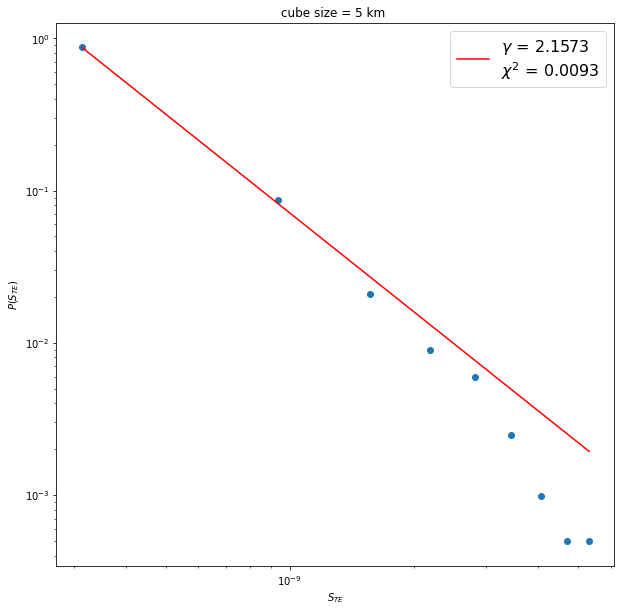

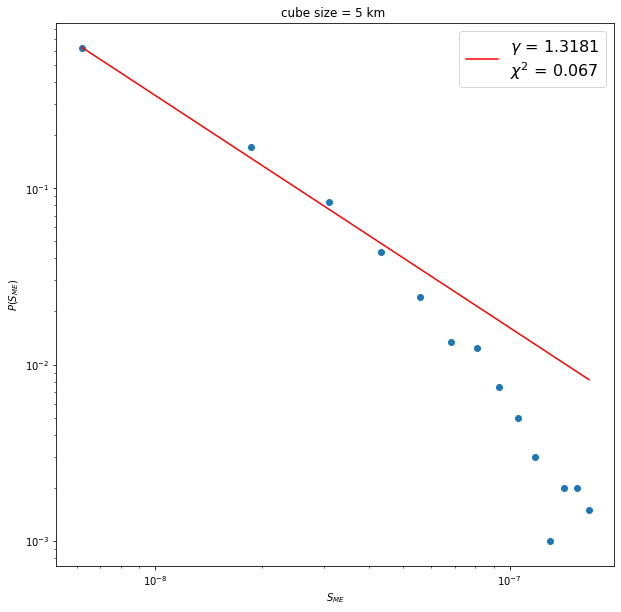

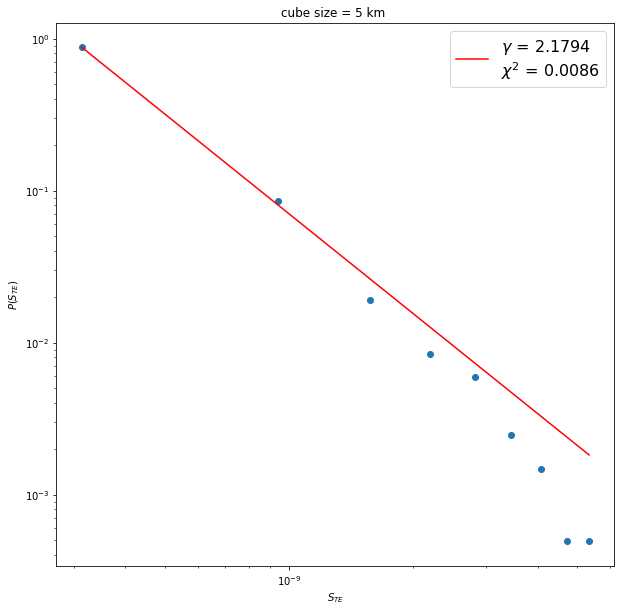

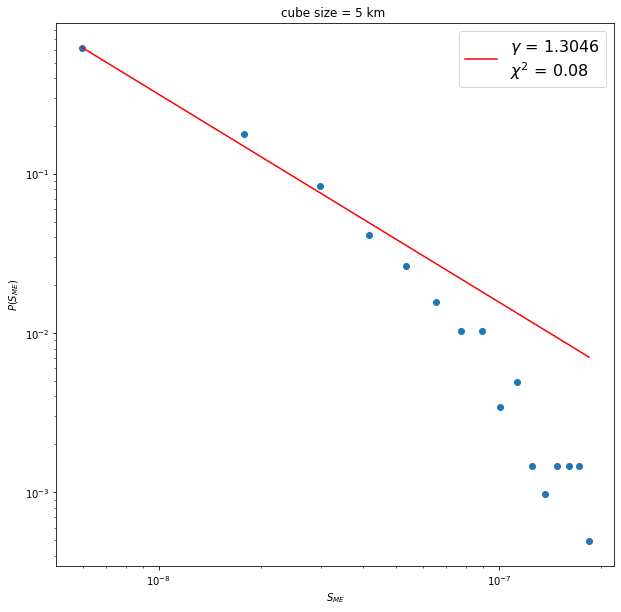

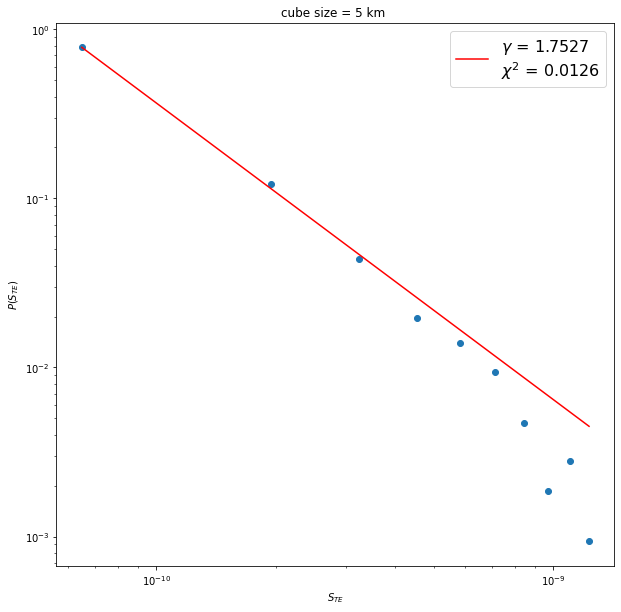

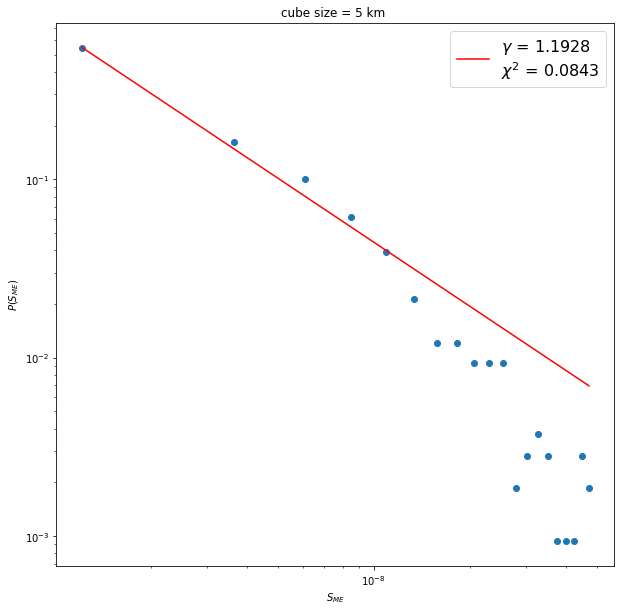

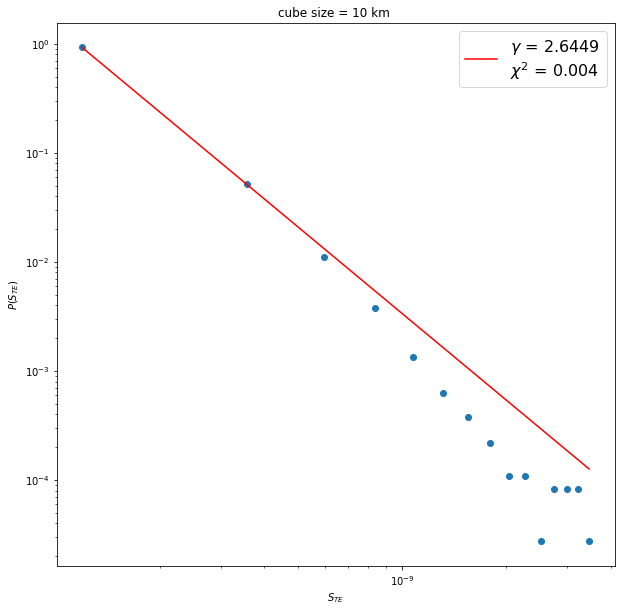

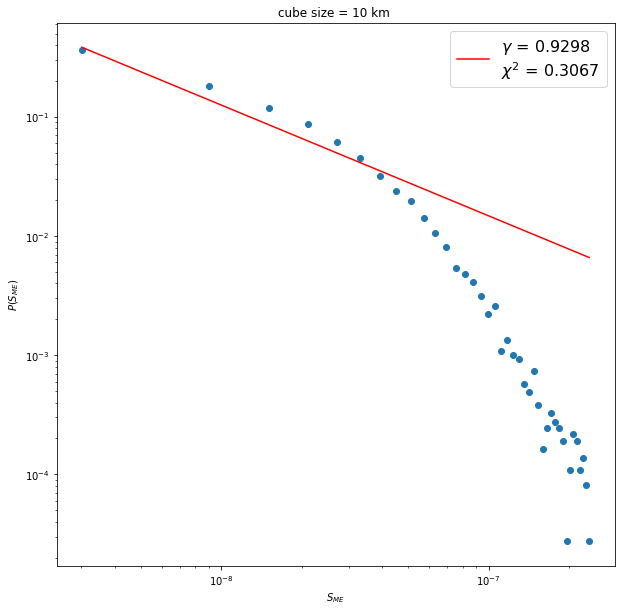

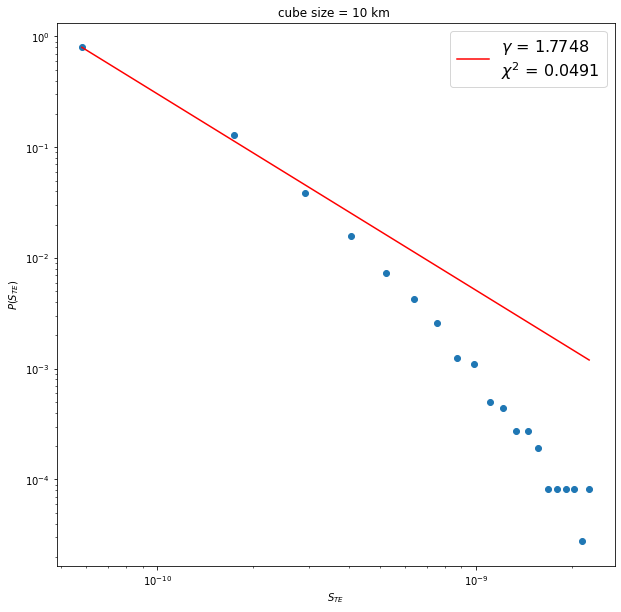

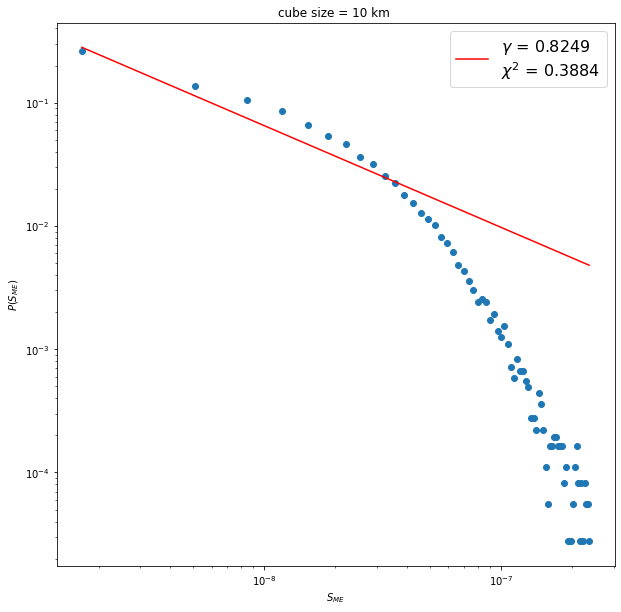

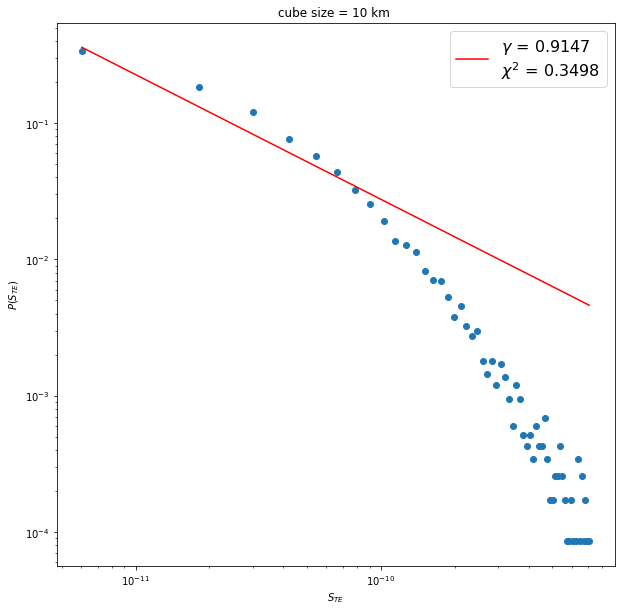

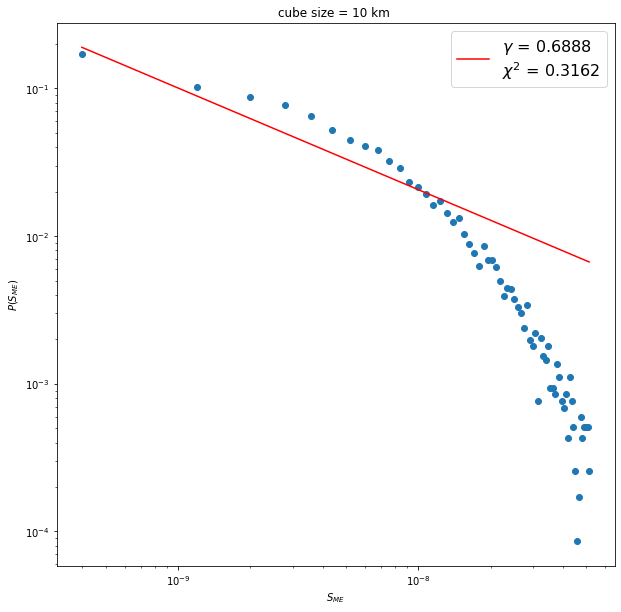

In [8]:
if not os.path.exists(f'./results/{region}/motifStatistics'):
    os.makedirs(f'results/{region}/motifStatistics')


sql_query= query(region)




for mag in (1,2,3):
    
    # Magnitude windows for the condition that collects the database through mySQL
    sql_query+=f" AND magnitude>={mag}"

    # Collect the database and create the graph
    # Collect the earthquakes
    quakes = getTable(sql_query)


    for side in (5,10):

        # Make the Cubes
        quakes = makeCubes(quakes,region,side,energyRelease=True)

        # Make the network
        quakesGraph = graphCreation3(quakes)


        # Get the motif nodes and the energy in motifs    
        motifNodes,energyMotif = totalMeanEnergyMotif(region,side,mag,motif,quakesGraph,quakes)
        
        # TRIANGLES 
        if motif == 'Triangles':
            motifTotalEnergy,motifMeanEnergy = areasInTriangles(motifNodes,energyMotif,quakesGraph,quakes)
        # TETRAHEDRONS
        else:
            motifTotalEnergy,motifMeanEnergy = volumesInSquares(motifNodes,energyMotif,quakesGraph,quakes)


        # TOTAL ENERGY / MEAN ENERGY PLOTS
        for motifstats in [motifTotalEnergy,motifMeanEnergy]:

            # hist and bins for the plots
            hist, bins = np.histogram(motifstats,bins=round(math.sqrt(len(motifstats))))
        
            # Create the x as hist with zeros, force into floats ! 
            x = np.zeros_like(hist.astype(float))
            for i in range(1,len(bins)):
                x[i-1]=((bins[i]+bins[i-1])/2)

            for i in range(len(hist)):
                if hist[i]==0:
                    y=np.array(hist[:i])
                    x=np.array(x[:i])
                    break
                else:
                    y=hist

            # normalize y axis 
            y_norm = [float(i)/sum(y) for i in y]

            # the curve fit of the data
            pars, cov = curve_fit(f=power_law,xdata=x,ydata=y_norm,maxfev=5000)

            # Compute the chi_squared goodness of fit = sum( ( observed - expected )^2 / expected )
            chi_squared = np.sum((y_norm-power_law(x,*pars))**2/power_law(x,*pars))
            

            # Plot the results
            plt.figure(figsize=(10,10))

            # The data, scattered
            plt.scatter(x,y_norm)
            plt.xscale('log')
            plt.yscale('log')

            # The fit
            plt.plot(x,power_law(x,*pars),
                        label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
                        color='red')

            # Legend : gamma coefficient of fit and chi_squared goodness of fit
            plt.legend(loc='upper right',fontsize=16,frameon=True)

            # Title of connectivity distribution ( data + fit )
            plt.title(f'cube size = {side} km ')

            # TOTAL MAGNITUDE IN MOTIF
            if motifstats == motifTotalEnergy:

                # TRIANGLES LABELS
                if motif == "Triangles":
                    plt.xlabel(r'$S_{TE}$')
                    plt.ylabel(r'$P(S_{TE})$')
                # TETRAHEDRONS LABELS
                else:
                    plt.xlabel(r'$V_{TE}$')
                    plt.ylabel(r'$P(V_{TE})$')
                                

            # MEAN MAGNITUDE IN MOTIF
            else:

                # TRIANGLE LABELS
                if motif == "Triangles":
                    plt.xlabel(r'$S_{ME}$')
                    plt.ylabel(r'$P(S_{ME})$')
                # TETRAHEDRONS LABELS
                else:
                    plt.xlabel(r'$V_{ME}$')
                    plt.ylabel(r'$P(V_{ME})$')


            plt.savefig(f'./results/{region}/motifStatistics/{motifstats}{motif}_network{region}_{side}km_{mag}mag.png',
                            facecolor='white', transparent=False)
        
        # Extract the magnitude restrictions from the condition 
        sql_query = sql_query.replace(f" AND magnitude>={mag}", '')


/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/media/gabipana/hdd1/Work/PROJECTS/seismicNetw

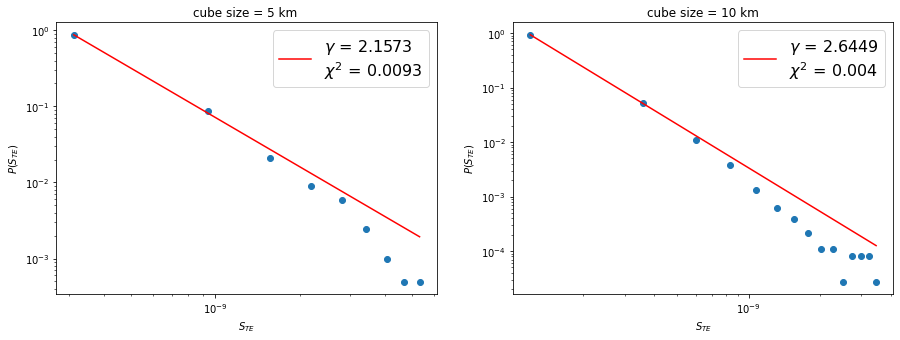

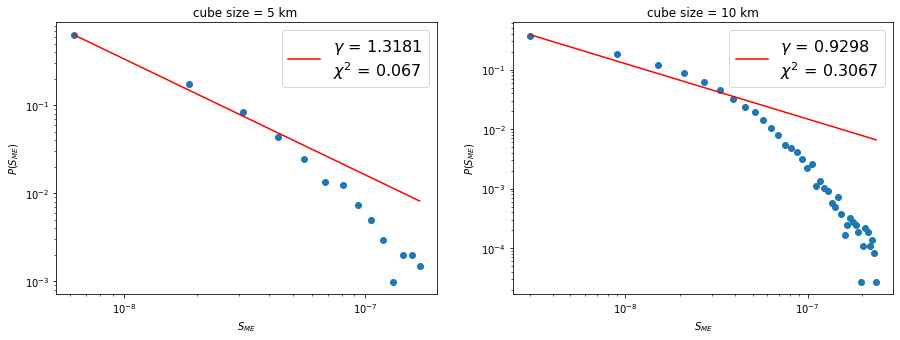

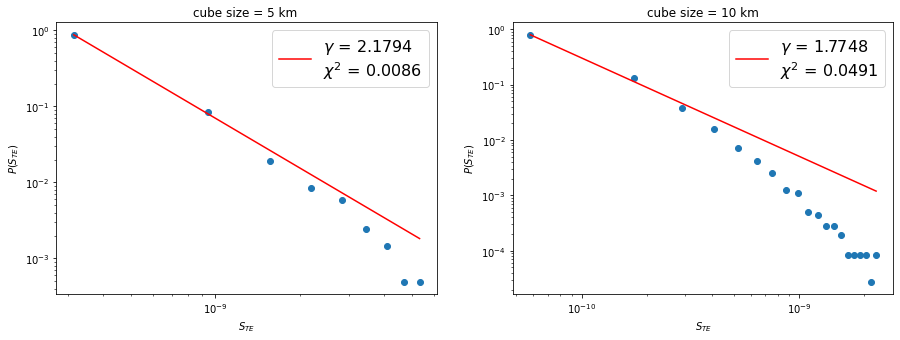

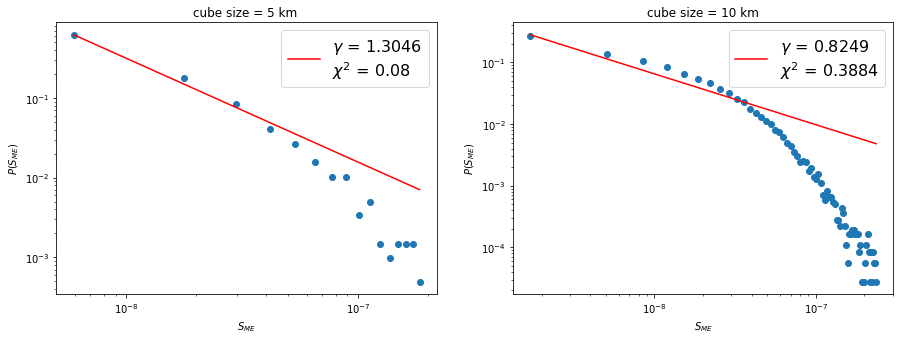

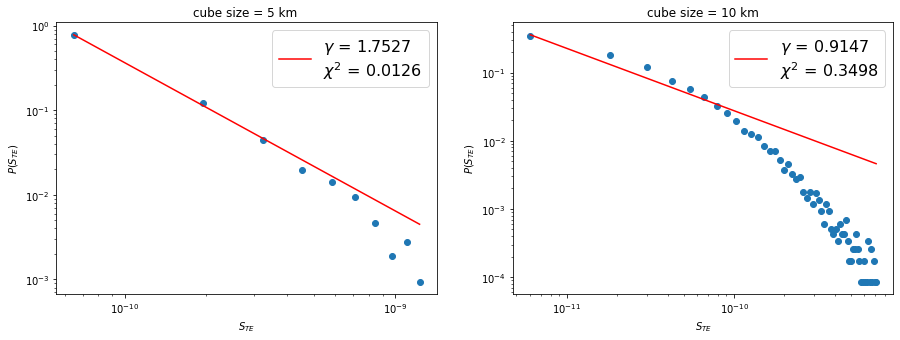

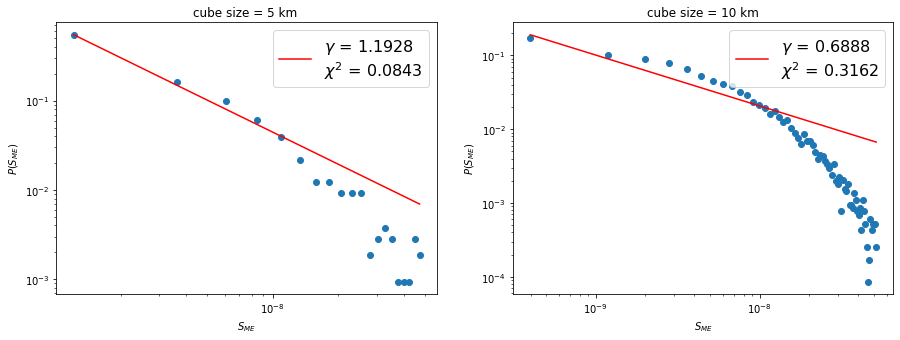

In [6]:
if not os.path.exists(f'./results/{region}/motifStatistics'):
    os.makedirs(f'results/{region}/motifStatistics')


sql_query= query(region)

for mag in (1,2,3):
    
    # Magnitude windows for the condition that collects the database through mySQL
    sql_query+=f" AND magnitude>={mag}"
    

    for side in (5,10):
        # Collect the database and create the graph
        # Magnitude window for the query that collects the database through mySQL


        # Collect the earthquakes
        quakes = getTable(sql_query)

        # Make the Cubes
        quakes = makeCubes(quakes,region,side,energyRelease=True)

        # Make the network
        G = graphCreation3(quakes)
        
        motifNodes,energyMotif = totalMeanEnergyMotif(region,side,mag,motif,G,quakes)
        
        areasWeightTotalMag,areasWeightMeanMag = areasInTriangles(motifNodes,energyMotif,G,quakes)
        
        # TOTAL ENERGY PLOTS
        hist, bins = np.histogram(areasWeightTotalMag,bins=round(math.sqrt(len(areasWeightTotalMag))))
        
        # Create the x as hist with zeros, force into floats ! 
        x = np.zeros_like(hist.astype(float))
        for i in range(1,len(bins)):
            x[i-1]=((bins[i]+bins[i-1])/2)

        for i in range(len(hist)):
            if hist[i]==0:
                y=np.array(hist[:i])
                x=np.array(x[:i])
                break
            else:
                y=hist

        y_norm = [float(i)/sum(y) for i in y]

        pars, cov = curve_fit(f=power_law,xdata=x,ydata=y_norm,maxfev=5000)

        # Compute the chi_squared goodness of fit = sum( ( observed - expected )^2 / expected )
        chi_squared = np.sum((y_norm-power_law(x,*pars))**2/power_law(x,*pars))
        
        if side == 5:
            # Plot the results
            fig, ax = plt.subplots(1,2,figsize=(15,5))

            # The data, scattered
            ax[0].scatter(x,y_norm)
            ax[0].set_xscale('log')
            ax[0].set_yscale('log')
            # The fit
            ax[0].plot(x,power_law(x,*pars),
                       label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
                       color='red')


            # Legend : gamma coefficient of fit and chi_squared goodness of fit
            ax[0].legend(loc='upper right',fontsize=16,frameon=True)

            # Title of connectivity distribution ( data + fit )
            ax[0].set_title('cube size = 5 km ')
            ax[0].set_xlabel(r'$S_{TE}$')
            ax[0].set_ylabel(r'$P(S_{TE})$')

        if side == 10 :
            # Connectivity distribution ( data + fit)
            # The data, scattered
            ax[1].scatter(x,y_norm)
            ax[1].set_xscale('log')
            ax[1].set_yscale('log')
            # The fit
            ax[1].plot(x,power_law(x,*pars),
                       label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
                       color='red')


            # Legend : gamma coefficient of fit and chi_squared goodness of fit
            ax[1].legend(loc='upper right',fontsize=16,frameon=True)

            # Title of connectivity distribution ( data + fit )
            ax[1].set_title('cube size = 10 km')
            ax[1].set_xlabel(r'$S_{TE}$')
            ax[1].set_ylabel(r'$P(S_{TE})$')
            
            #plt.suptitle(f'Surface distributions in {region} - magnitude>{mag}',fontsize=18)
            fig.savefig(f'./results/{region}/motifStatistics/motifs{motif}_network{region}_totalEnergy_{mag}mag.png')
           
        
        # MEAN ENERGY PLOTS 
        #fig.clear()
        hist, bins = np.histogram(areasWeightMeanMag,bins=round(math.sqrt(len(areasWeightMeanMag))))

        # Create the x as hist with zeros, force into floats ! 
        x = np.zeros_like(hist.astype(float))
        for i in range(1,len(bins)):
            x[i-1]=((bins[i]+bins[i-1])/2)

        for i in range(len(hist)):
            if hist[i]==0:
                y=np.array(hist[:i])
                x=np.array(x[:i])
                break
            else:
                y=hist

        y_norm = [float(i)/sum(y) for i in y]

        pars, cov = curve_fit(f=power_law,xdata=x,ydata=y_norm,maxfev=5000)

        # Compute the chi_squared goodness of fit = sum( ( observed - expected )^2 / expected )
        chi_squared = np.sum((y_norm-power_law(x,*pars))**2/power_law(x,*pars))

        if side == 5:
            # Plot the results
            fig2, ax2 = plt.subplots(1,2,figsize=(15,5))

            # The data, scattered
            ax2[0].scatter(x,y_norm)
            ax2[0].set_xscale('log')
            ax2[0].set_yscale('log')
            # The fit
            ax2[0].plot(x,power_law(x,*pars),
                       label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
                       color='red')


            # Legend : gamma coefficient of fit and chi_squared goodness of fit
            ax2[0].legend(loc='upper right',fontsize=16,frameon=True)

            # Title of connectivity distribution ( data + fit )
            ax2[0].set_title('cube size = 5 km ')
            ax2[0].set_xlabel(r'$S_{ME}$')
            ax2[0].set_ylabel(r'$P(S_{ME})$')

        if side == 10 :
            # Connectivity distribution ( data + fit)
            # The data, scattered
            ax2[1].scatter(x,y_norm)
            ax2[1].set_xscale('log')
            ax2[1].set_yscale('log')
            # The fit
            ax2[1].plot(x,power_law(x,*pars),
                       label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
                       color='red')


            # Legend : gamma coefficient of fit and chi_squared goodness of fit
            ax2[1].legend(loc='upper right',fontsize=16,frameon=True)

            # Title of connectivity distribution ( data + fit )
            ax2[1].set_title('cube size = 10 km')
            ax2[1].set_xlabel(r'$S_{ME}$')
            ax2[1].set_ylabel(r'$P(S_{ME})$')

            #plt.suptitle(f'Surface distributions in {region} - magnitude>{mag}',fontsize=18)
            fig2.savefig(f'./results/{region}/motifStatistics/motifs{motif}_network{region}_meanEnergy_{mag}mag.png')

    # Extract the magnitude restrictions from the condition 
    sql_query = sql_query.replace(f" AND magnitude>={mag}", '')

In [15]:
# For which region networks do you want to analyze motifs ?
region = input('Input region : vrancea / romania / california / italy / japan : ')

# What motifs do you want to discover ?
motif = input('Input motif: Triangles (for areas) / Tetrahedrons (for volumes) : ')

In [5]:
if not os.path.exists(f'./results/{region}/motifStatistics'):
    os.makedirs(f'results/{region}/motifStatistics')


sql_query= query(region)

for mag in (1,2,3):
    
    # Magnitude windows for the condition that collects the database through mySQL
    sql_query+=f" AND magnitude>={mag}"
    

    for side in (5,10):
        # Collect the database and create the graph
        # Magnitude window for the query that collects the database through mySQL


        # Collect the earthquakes
        quakes = getTable(sql_query)

        # Make the Cubes
        quakes = makeCubes(quakes,region,side,energyRelease=True)

        # Make the network
        G = graphCreation3(quakes)
        
        motifNodes,energyMotif = totalMeanEnergyMotif(region,side,mag,motif,G,quakes)
        
        volumesWeightTotalMag,volumesWeightMeanMag = volumesInSquares(motifNodes,energyMotif,G,quakes)
        hist, bins = np.histogram(volumesWeightTotalMag,bins=round(math.sqrt(len(volumesWeightTotalMag))))
        
        # Create the x as hist with zeros, force into floats ! 
        x = np.zeros_like(hist.astype(float))
        for i in range(1,len(bins)):
            x[i-1]=((bins[i]+bins[i-1])/2)

        for i in range(len(hist)):
            if hist[i]==0:
                y=np.array(hist[:i])
                x=np.array(x[:i])
                break
            else:
                y=hist

        y_norm = [float(i)/sum(y) for i in y]

        pars, cov = curve_fit(f=power_law,xdata=x,ydata=y_norm,maxfev=5000)

        # Compute the chi_squared goodness of fit = sum( ( observed - expected )^2 / expected )
        chi_squared = np.sum((y_norm-power_law(x,*pars))**2/power_law(x,*pars))
        
        if side == 5:
            # Plot the results
            fig, ax = plt.subplots(1,2,figsize=(15,5))

            # The data, scattered
            ax[0].scatter(x,y_norm)
            ax[0].set_xscale('log')
            ax[0].set_yscale('log')
            # The fit
            ax[0].plot(x,power_law(x,*pars),
                       label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
                       color='red')


            # Legend : gamma coefficient of fit and chi_squared goodness of fit
            ax[0].legend(loc='upper right',fontsize=16, fontsize=20, fontweight='bold', frameon=True)

            # Title of connectivity distribution ( data + fit )
            ax[0].set_title('cube size = 5 km ')
            ax[0].set_xlabel(r'$V_{TE}$')
            ax[0].set_ylabel(r'$P(V_{TE})$')

        if side == 10 :
            # Connectivity distribution ( data + fit)
            # The data, scattered
            ax[1].scatter(x,y_norm)
            ax[1].set_xscale('log')
            ax[1].set_yscale('log')
            # The fit
            ax[1].plot(x,power_law(x,*pars),
                       label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
                       color='red')


            # Legend : gamma coefficient of fit and chi_squared goodness of fit
            ax[1].legend(loc='upper right',fontsize=16,frameon=True)

            # Title of connectivity distribution ( data + fit )
            ax[1].set_title('cube size = 10 km')
            ax[1].set_xlabel(r'$V_{TE}$')
            ax[1].set_ylabel(r'$P(V_{TE})$')
            
            #plt.suptitle(f'Volume distributions in {region} - magnitude>{mag}',fontsize=18)
            fig.savefig(f'./results/{region}/motifStatistics/motifs{motif}_network{region}_totalEnergy_{mag}mag.png')
        
            #fig.savefig(f'./motifs{region}Statistics/quakes{region}_totalEnergy_{mag}mag_squaresVolumes.png')

            
        # MEAN ENERGY MOTIFS
        #fig.clear()
        hist, bins = np.histogram(volumesWeightMeanMag,bins=round(math.sqrt(len(volumesWeightMeanMag))))
        
        # Create the x as hist with zeros, force into floats ! 
        x = np.zeros_like(hist.astype(float))
        for i in range(1,len(bins)):
            x[i-1]=((bins[i]+bins[i-1])/2)

        for i in range(len(hist)):
            if hist[i]==0:
                y=np.array(hist[:i])
                x=np.array(x[:i])
                break
            else:
                y=hist

        y_norm = [float(i)/sum(y) for i in y]

        pars, cov = curve_fit(f=power_law,xdata=x,ydata=y_norm,maxfev=5000)

        # Compute the chi_squared goodness of fit = sum( ( observed - expected )^2 / expected )
        chi_squared = np.sum((y_norm-power_law(x,*pars))**2/power_law(x,*pars))
        
        if side == 5:
            # Plot the results
            fig2, ax2 = plt.subplots(1,2,figsize=(15,5))

            # The data, scattered
            ax2[0].scatter(x,y_norm)
            ax2[0].set_xscale('log')
            ax2[0].set_yscale('log')
            # The fit
            ax2[0].plot(x,power_law(x,*pars),
                       label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
                       color='red')


            # Legend : gamma coefficient of fit and chi_squared goodness of fit
            ax2[0].legend(loc='upper right',fontsize=16,frameon=True)

            # Title of connectivity distribution ( data + fit )
            ax2[0].set_title('cube size = 5 km ')
            ax2[0].set_xlabel(r'$V_{ME}$')
            ax2[0].set_ylabel(r'$P(V_{ME})$')

        if side == 10 :
            # Connectivity distribution ( data + fit)
            # The data, scattered
            ax2[1].scatter(x,y_norm)
            ax2[1].set_xscale('log')
            ax2[1].set_yscale('log')
            # The fit
            ax2[1].plot(x,power_law(x,*pars),
                       label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
                       color='red')

            # Legend : gamma coefficient of fit and chi_squared goodness of fit
            ax2[1].legend(loc='upper right',fontsize=16,frameon=True)

            # Title of connectivity distribution ( data + fit )
            ax2[1].set_title('cube size = 10 km')
            ax2[1].set_xlabel(r'$V_{ME}$')
            ax2[1].set_ylabel(r'$P(V_{ME})$')
            
            #plt.suptitle(f'Volume distributions in {region} - magnitude>{mag}',fontsize=18)
            fig2.savefig(f'./results/{region}/motifStatistics/motifs{motif}_network{region}_meanEnergy_{mag}mag.png')

            #fig2.savefig(f'./motifs{region}Statistics/quakes{region}_meanEnergy_{mag}mag_squaresVolumes.png')
    # Extract the magnitude restrictions from the condition 
    sql_query = sql_query.replace(f" AND magnitude>={mag}", '')

/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


IndexError: list index out of range